In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:

# import thư viện
from sklearn.datasets import load_iris
# Thực hiện load dữ liệu
iris_data = load_iris() 

# In ra 10 input đầu tiên
print('First 10 inputs: ')
print(iris_data.data[:10])
# In ra 10 output đầu tiên
print('First 10 output (label): ')
print(iris_data.target[:10])

First 10 inputs: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
First 10 output (label): 
[0 0 0 0 0 0 0 0 0 0]


In [8]:
# Gán input vào biến X
X = iris_data.data
# Gán output vào biến y 
y = iris_data.target.reshape(-1,1)

# Thực hiện Onehot transform
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)
print("Output after transform")
print(y[:10])

# Chia dữ liệu train, test với tỷ lệ 80% cho train và 20% cho test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Output after transform
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [9]:
# Khai báo model
model = Sequential()

model.add(Dense(128, input_shape=(4,), activation='relu', name='layer1'))
model.add(Dense(128, activation='relu', name='layer2'))
model.add(Dense(3, activation='softmax', name='output'))

# Cài đặt hàm tối ưu Adam 
optimizer = Adam()
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# In cấu trúc mạng ra màn hình
print('Detail of network: ')
print(model.summary())

Detail of network: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 128)               640       
_________________________________________________________________
layer2 (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 3)                 387       
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# Train model
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Kiểm tra trên tập test
results = model.evaluate(X_test, y_test)

print('Test loss: {:4f}'.format(results[0]))
print('Test accuracy: {:4f}'.format(results[1]))

Epoch 1/10
120/120 [==============================] - 0s 159us/step - loss: 0.3818 - accuracy: 0.9833
Epoch 2/10
120/120 [==============================] - 0s 139us/step - loss: 0.3555 - accuracy: 0.9833
Epoch 3/10
120/120 [==============================] - 0s 133us/step - loss: 0.3323 - accuracy: 0.9583
Epoch 4/10
120/120 [==============================] - 0s 122us/step - loss: 0.3092 - accuracy: 0.9583
Epoch 5/10
120/120 [==============================] - 0s 124us/step - loss: 0.2900 - accuracy: 0.9750
Epoch 6/10
120/120 [==============================] - 0s 126us/step - loss: 0.2712 - accuracy: 0.9833
Epoch 7/10
120/120 [==============================] - 0s 120us/step - loss: 0.2543 - accuracy: 0.9750
Epoch 8/10
120/120 [==============================] - 0s 119us/step - loss: 0.2424 - accuracy: 0.9833
Epoch 9/10
120/120 [==============================] - 0s 129us/step - loss: 0.2289 - accuracy: 0.9667
Epoch 10/10
30/30 [==============================] - 0s 1ms/step
Test loss: 0.2630

In [ ]:
# Train model
import matplotlib.pyplot as pyplot
history = model.fit(X_train, y_train, batch_size=32, epochs=200,validation_data=(X_test,y_test))

# plot loss during training


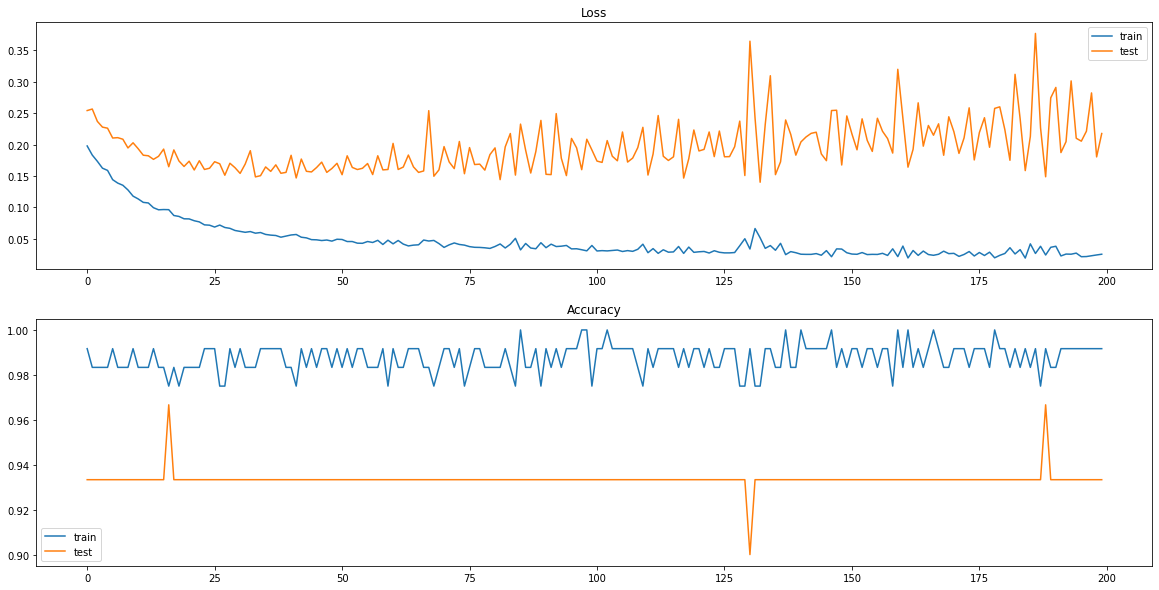

In [14]:
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [56]:


# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

y_hat = model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(y_test, axis=1)


# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, y_hat, multi_class='ovr')
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test_label, y_pred)
print(matrix)

Accuracy: 0.933333
Precision: 0.944444
Recall: 0.939394
F1 score: 0.936364
ROC AUC: 0.993477
[[ 9  0  0]
 [ 0  9  2]
 [ 0  0 10]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


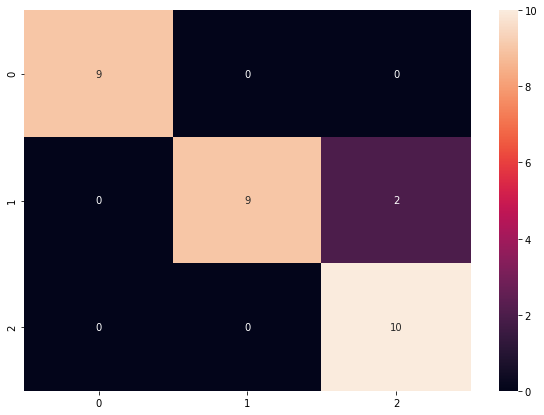

In [55]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(matrix, index = [i for i in "012"],
                  columns = [i for i in "012"])
pyplot.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)